<a href="https://colab.research.google.com/github/Neelov12/Diabetes_Diagnosis_Tool/blob/main/CSE475_Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1

**Data Selection**
The dataset upon which Milestone 2 is built is titled *Pima Indians Diabetes Database* sourced from the *National Institute of Diabetes and Digestive and Kidney Diseases* and can be found [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/) (Kraggle).


*   From the authors, "The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."


*   **Description of dataset:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

*   While the data directly only has 9 features, the feature "Diabetes Pedigree Function" is based on multiple different features calculated by the dataset researchers. The dataset is not only a useful tool for engineers to simulate models onto, but due to its choice of features (which is calculated from other features), has the necessary level of complexity to engineer an accurate classification model that can be used in a real world setting.



## Load Data

I am using the Google Colab environment where datasets need to be uploaded

In [3]:
from google.colab import files

uploaded = files.upload()

Saving diabetes 3.csv to diabetes 3.csv


If testing on a non google colab environment or using file name from local directory, please set 'filename' to your local file path and remove my first two df and df 2 declarations. Then, uncomment the two df declarations before "print(df2)"

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

filename = "diabetes 3.csv"

df = pd.read_csv(io.BytesIO(uploaded[filename]))
# load a few rows of diabetes into df2 and display
df2 = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=100)

#df = pd.read_csv(filename)
#df2 = pd.read_csv(filename, nrows=5)
print(df2)

# Convert all columns to numeric, invalid parsing will be set as NaN
df_cleaned = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (i.e., rows with non-numeric values)
df_cleaned = df_cleaned.dropna()

# Display the cleaned DataFrame
print(df_cleaned)

df = df_cleaned

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
..          ...      ...            ...            ...      ...   ...   
95            6      144             72             27      228  33.9   
96            2       92             62             28        0  31.6   
97            1       71             48             18       76  20.4   
98            6       93             50             30       64  28.7   
99            1      122             90             51      220  49.7   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31

Store dataset points into editable objects

       Pregnancies
count   768.000000
mean      3.845052
std       3.369578
min       0.000000
25%       1.000000
50%       3.000000
75%       6.000000
max      17.000000


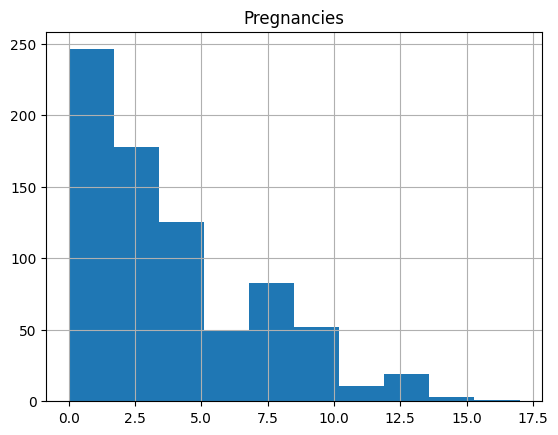

          Glucose
count  768.000000
mean   120.894531
std     31.972618
min      0.000000
25%     99.000000
50%    117.000000
75%    140.250000
max    199.000000


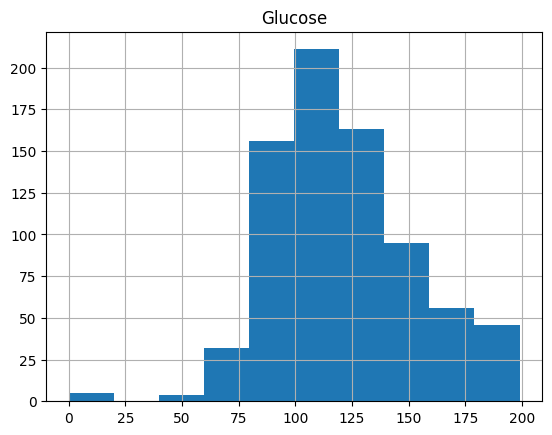

       BloodPressure
count     768.000000
mean       69.105469
std        19.355807
min         0.000000
25%        62.000000
50%        72.000000
75%        80.000000
max       122.000000


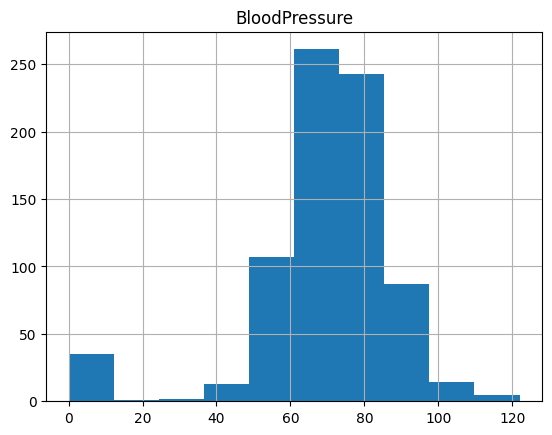

       SkinThickness
count     768.000000
mean       20.536458
std        15.952218
min         0.000000
25%         0.000000
50%        23.000000
75%        32.000000
max        99.000000


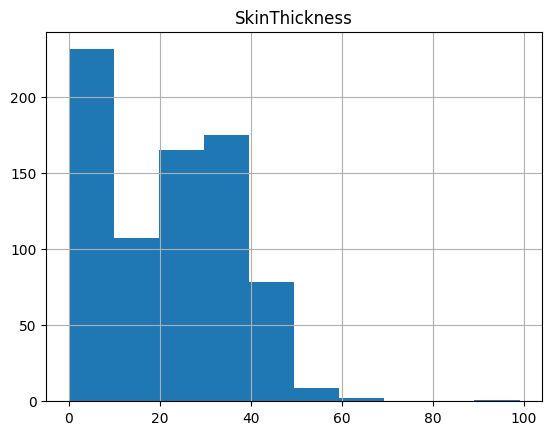

          Insulin
count  768.000000
mean    79.799479
std    115.244002
min      0.000000
25%      0.000000
50%     30.500000
75%    127.250000
max    846.000000


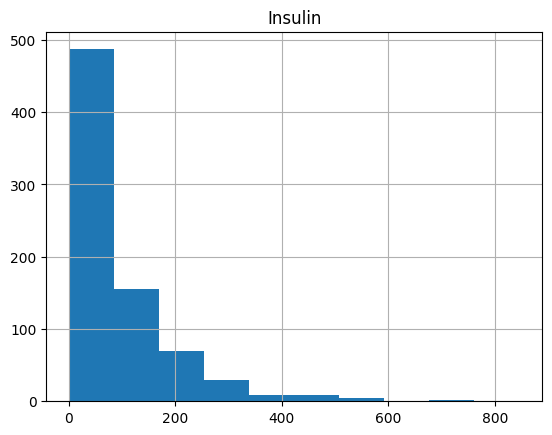

              BMI
count  768.000000
mean    31.992578
std      7.884160
min      0.000000
25%     27.300000
50%     32.000000
75%     36.600000
max     67.100000


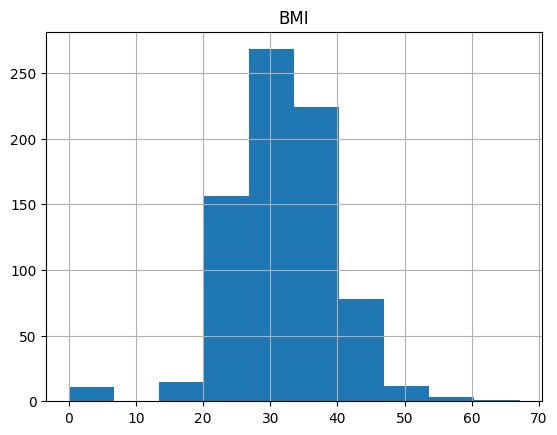

       DiabetesPedigreeFunction
count                768.000000
mean                   0.471876
std                    0.331329
min                    0.078000
25%                    0.243750
50%                    0.372500
75%                    0.626250
max                    2.420000


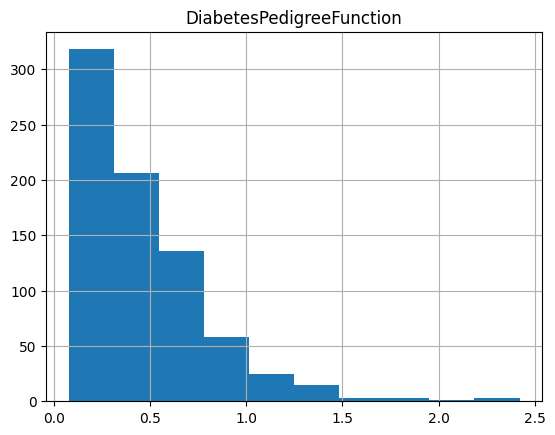

              Age
count  768.000000
mean    33.240885
std     11.760232
min     21.000000
25%     24.000000
50%     29.000000
75%     41.000000
max     81.000000


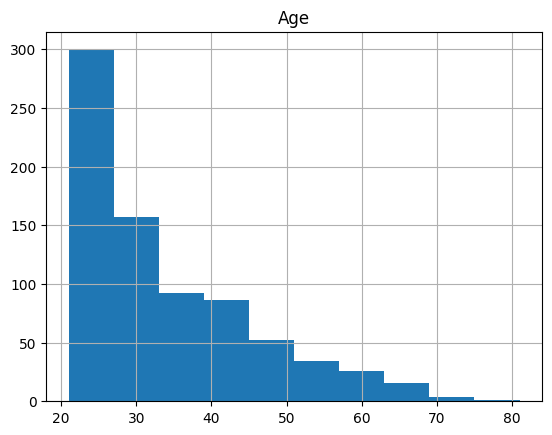

          Outcome
count  768.000000
mean     0.348958
std      0.476951
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


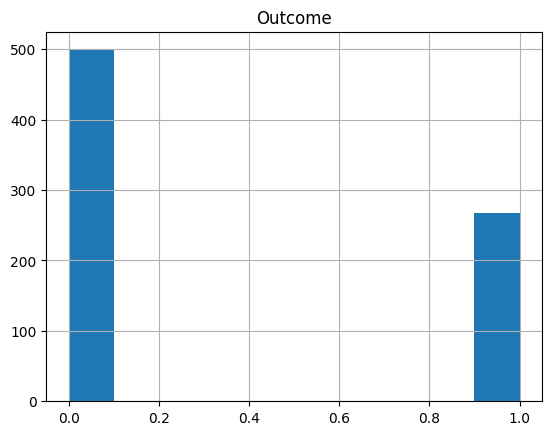

In [6]:
# List columns as an array of col
col = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
       "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

d = pd.DataFrame(df)

dfs=[]
for i in range(0, len(col)):
  dfs.append(pd.DataFrame(df_cleaned, columns=[col[i]]))
  print(dfs[i].describe())
  dfs[i].hist()
  plt.show()
print()

As we can see from the visualizations, the features "BloodPressure" and "SkinThickness have a large amount of 0s, which may be a result of unknown values of both features. Let's handle this by removing it from our data.

In [7]:
# Features to check for 0 values
features_to_check = ["SkinThickness", "BloodPressure", "Glucose", "BMI"]

# Identify rows where any of the specified features are 0
rows_with_zeros = (df_cleaned[features_to_check] == 0).any(axis=1)

# Filter out those rows
df_cleaned = df_cleaned[~rows_with_zeros]

# Reset index after filtering
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
print(f"Number of rows after cleaning: {df_cleaned.shape[0]}")
print(df_cleaned.head())

Number of rows after cleaning: 532
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            1       89             66             23       94  28.1   
3            0      137             40             35      168  43.1   
4            3       78             50             32       88  31.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.167   21        0  
3                     2.288   33        1  
4                     0.248   26        1  


Let's now visualize the cleaned data

       Pregnancies
count   532.000000
mean      3.516917
std       3.312036
min       0.000000
25%       1.000000
50%       2.000000
75%       5.000000
max      17.000000


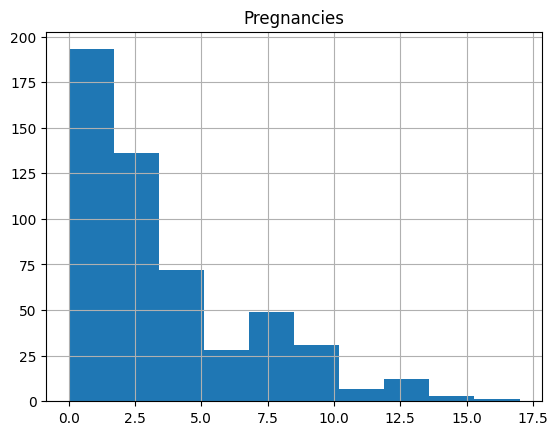

          Glucose
count  532.000000
mean   121.030075
std     30.999226
min     56.000000
25%     98.750000
50%    115.000000
75%    141.250000
max    199.000000


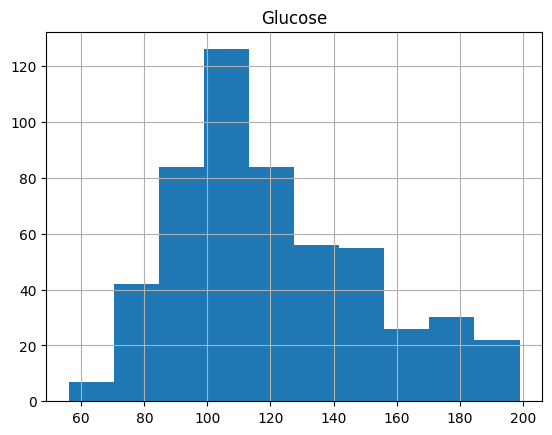

       BloodPressure
count     532.000000
mean       71.505639
std        12.310253
min        24.000000
25%        64.000000
50%        72.000000
75%        80.000000
max       110.000000


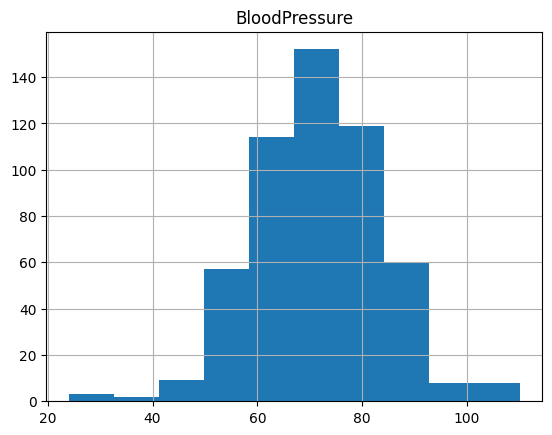

       SkinThickness
count     532.000000
mean       29.182331
std        10.523878
min         7.000000
25%        22.000000
50%        29.000000
75%        36.000000
max        99.000000


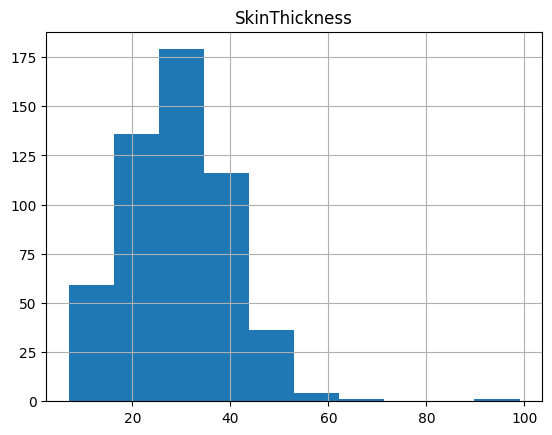

          Insulin
count  532.000000
mean   114.988722
std    123.007555
min      0.000000
25%      0.000000
50%     91.500000
75%    165.250000
max    846.000000


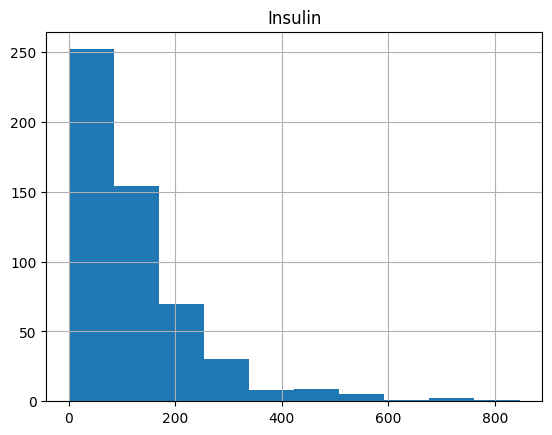

              BMI
count  532.000000
mean    32.890226
std      6.881109
min     18.200000
25%     27.875000
50%     32.800000
75%     36.900000
max     67.100000


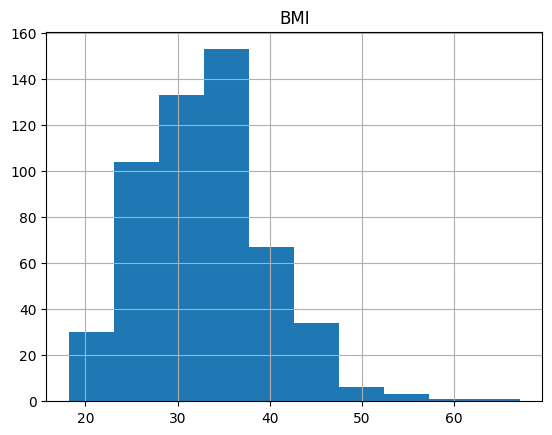

       DiabetesPedigreeFunction
count                532.000000
mean                   0.502966
std                    0.344546
min                    0.085000
25%                    0.258750
50%                    0.416000
75%                    0.658500
max                    2.420000


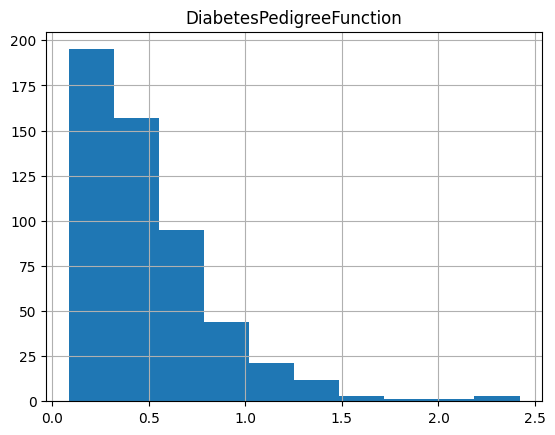

              Age
count  532.000000
mean    31.614662
std     10.761584
min     21.000000
25%     23.000000
50%     28.000000
75%     38.000000
max     81.000000


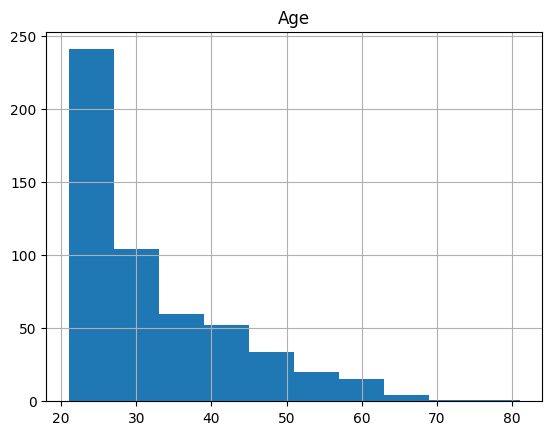

          Outcome
count  532.000000
mean     0.332707
std      0.471626
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000


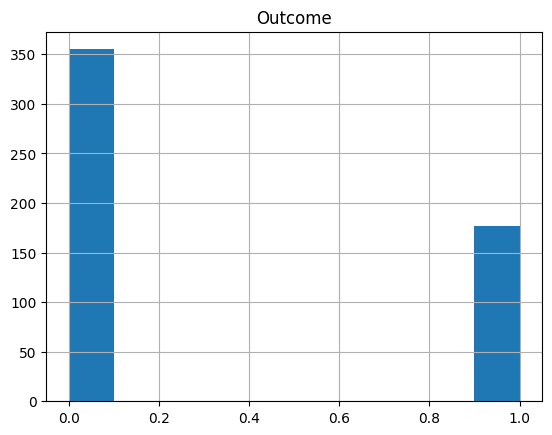

In [8]:
col = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
       "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

d = pd.DataFrame(df)

dfs=[]
for i in range(0, len(col)):
  dfs.append(pd.DataFrame(df_cleaned, columns=[col[i]]))
  print(dfs[i].describe())
  dfs[i].hist()
  plt.show()
print()

# Milestone 2

## 1. Model Selection


**1st Model of Choice:** Naive Bayes


The reasons for my use of Naive Bayes are outlined in the following points:


*   The nature of the dataset and the purpose in which it was created is to classify whether a patient has diabetes based on the predictive features recorded such as BMI, age, no. of pregnancies, etc. For this reason, a strong classification model is required
*   Given that the dataset is large, Naive Bayes is a useful model to use since it is fast, efficient, and simple to implement
*   There are some weaknesses to note. Despite being a powerful classification model, it works best under the assumption that the features are independent of each other. In most cases, with this dataset not being an exception, this is not the case. This also provides the user limited flexibility in the applicability of the results and in understanding the results



**2nd Model of Choice:** Logistic Regression

The reasons for my use of logistic regression are outlined in the following points:


*   The nature of the dataset, and the purpose in which it was developed, was to allow data analysts and engineers to determine if a patient has diabetes based on several predictor variables, such as BMI, age, no. of pregnancies, etc. By nature of the disease, somebody can either have or not have diabetes (binary classification). Seeing this, a binary classification model such as logistic regression is most useful in processing this dataset.
*   In addition, there are several strengths to using logistic regression. No model can definitively determine if a patient has diabetes. Not only is this the determination of a medical professional, but it would be inappropriate to use a model that *only* outputs binary results (has diabetes or doesn't) in a sensitive context where misdiagnosis can have devestating, chronic, consequences for a patient. Logistic regression solves this problem by outputting a *probability* of a binary determination based on the data. This provides the user, typically a medical professional, more context and maneuverability based on a result. It also accounts for variance in data. For example, a simple classification model would say someone with a 51% chance of having diabetes has the same likelihood of having the disease as someone with a 99% chance of having diabetes. Logistic regression would output the probabilities of both patients, allowing for more nuance.
* Another strength of the model is that it allows for quick, efficient, and simple implementation
* However, there are some weaknesses to note. Logistic regression does not work as well for nonlinear relationships between variables. Efforts have been taken to minimize the effects of this weakness such as using non-linear features



## 2. Model Training

### Model 1: Naive Bayes

First, train-teset split the data into 80-20

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42)

Now apply Naive Bayes to the training set. This will output the F-score of the training set for each feature using a simple 80-20 train-test set split.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

# Define features and target
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]  # Exclude "Outcome"
target = "Outcome"

# Iterate through each feature
f1_scores_nb_test_train = {}

for feature in features:
    # Define X as the current feature and y as the target
    X = df_cleaned[[feature]]
    y = df_cleaned[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Naive Bayes model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
    f1_scores_nb_test_train[feature] = f1

    print(f"Feature: {feature}, F1-Score: {f1}")

# Display F1-scores for all features
print("\nF1-Scores for each feature:")
print(f1_scores_nb_test_train)

Feature: Pregnancies, F1-Score: 0.36363636363636365
Feature: Glucose, F1-Score: 0.7213114754098361
Feature: BloodPressure, F1-Score: 0.10810810810810811
Feature: SkinThickness, F1-Score: 0.2222222222222222
Feature: Insulin, F1-Score: 0.2608695652173913
Feature: BMI, F1-Score: 0.24
Feature: DiabetesPedigreeFunction, F1-Score: 0.19047619047619047
Feature: Age, F1-Score: 0.425531914893617

F1-Scores for each feature:
{'Pregnancies': 0.36363636363636365, 'Glucose': 0.7213114754098361, 'BloodPressure': 0.10810810810810811, 'SkinThickness': 0.2222222222222222, 'Insulin': 0.2608695652173913, 'BMI': 0.24, 'DiabetesPedigreeFunction': 0.19047619047619047, 'Age': 0.425531914893617}


Next, repeat the process using k-Fold Cross-Validation

In [11]:
from sklearn.model_selection import KFold
import numpy as np

# Number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store F1-scores for each feature
f1_scores_nb_cv = {}

for feature in features:
    scores = []  # Store F1-scores for all folds for this feature

    # Perform k-Fold Cross-Validation
    for train_index, test_index in kf.split(df_cleaned):
        # Split the data
        X_train, X_test = df_cleaned.iloc[train_index][[feature]], df_cleaned.iloc[test_index][[feature]]
        y_train, y_test = df_cleaned.iloc[train_index][target], df_cleaned.iloc[test_index][target]

        # Train Naive Bayes model
        model = GaussianNB()
        model.fit(X_train, y_train)

        # Predict on the test fold
        y_pred = model.predict(X_test)

        # Calculate F1-score
        f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
        scores.append(f1)

    # Compute the average F1-score for this feature
    avg_f1 = np.mean(scores)
    f1_scores_nb_cv[feature] = avg_f1

    print(f"Feature: {feature}, F1-Scores for folds: {scores}, Average F1-Score: {avg_f1}")

# Final F1-scores for all features
print("\nFinal Averaged F1-Scores for each feature:")
print(f1_scores_nb_cv)

Feature: Pregnancies, F1-Scores for folds: [0.36363636363636365, 0.25, 0.2978723404255319, 0.42105263157894735, 0.509090909090909], Average F1-Score: 0.36833044894635036
Feature: Glucose, F1-Scores for folds: [0.7213114754098361, 0.4, 0.49056603773584906, 0.6578947368421053, 0.6909090909090909], Average F1-Score: 0.5921362681793763
Feature: BloodPressure, F1-Scores for folds: [0.10810810810810811, 0.2127659574468085, 0.10810810810810811, 0.08888888888888889, 0.1111111111111111], Average F1-Score: 0.12579643473260496
Feature: SkinThickness, F1-Scores for folds: [0.2222222222222222, 0.3181818181818182, 0.2608695652173913, 0.16, 0.15], Average F1-Score: 0.22225472112428638
Feature: Insulin, F1-Scores for folds: [0.2608695652173913, 0.17777777777777778, 0.2857142857142857, 0.13043478260869565, 0.3111111111111111], Average F1-Score: 0.2331815044858523
Feature: BMI, F1-Scores for folds: [0.24, 0.2857142857142857, 0.2608695652173913, 0.36363636363636365, 0.4], Average F1-Score: 0.310044042913

Now we have successfully trained the Naive Bayes model using both a simple 80-20 split and using cross-validation and found the F-scores of each. We will look closer and analyze the F-scores in the next section "3. Model Evaluation".

### Model 2: Logistic Regression

I have already initialized the test-train sets and the features, so there is no need to do that again. Let's just jump into finding the F-scores of the logistic regression model using the 80-20 test-train model

In [12]:
from sklearn.linear_model import LogisticRegression

# Store F1-scores for each feature
f1_scores_lr_test_train = {}

for feature in features:
    # Define X as the current feature and y as the target
    X = df_cleaned[[feature]]
    y = df_cleaned[target]

    # Split data into training and testing sets (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
    f1_scores_lr_test_train[feature] = f1

    print(f"Feature: {feature}, F1-Score (80-20 Split): {f1}")

# Final F1-scores for all features (80-20 split)
print("\nFinal F1-Scores for each feature (80-20 Split):")
print(f1_scores_lr_test_train)

Feature: Pregnancies, F1-Score (80-20 Split): 0.25
Feature: Glucose, F1-Score (80-20 Split): 0.7096774193548387
Feature: BloodPressure, F1-Score (80-20 Split): 0.10810810810810811
Feature: SkinThickness, F1-Score (80-20 Split): 0.2222222222222222
Feature: Insulin, F1-Score (80-20 Split): 0.2608695652173913
Feature: BMI, F1-Score (80-20 Split): 0.24
Feature: DiabetesPedigreeFunction, F1-Score (80-20 Split): 0.20512820512820512
Feature: Age, F1-Score (80-20 Split): 0.425531914893617

Final F1-Scores for each feature (80-20 Split):
{'Pregnancies': 0.25, 'Glucose': 0.7096774193548387, 'BloodPressure': 0.10810810810810811, 'SkinThickness': 0.2222222222222222, 'Insulin': 0.2608695652173913, 'BMI': 0.24, 'DiabetesPedigreeFunction': 0.20512820512820512, 'Age': 0.425531914893617}


Next, let's repeat the process for cross validation using k-fold

In [13]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store F1-scores for each feature
f1_scores_lr_cv = {}

for feature in features:
    scores = []  # Store F1-scores for all folds for this feature

    # Perform k-Fold Cross-Validation
    for train_index, test_index in kf.split(df_cleaned):
        # Split the data
        X_train, X_test = df_cleaned.iloc[train_index][[feature]], df_cleaned.iloc[test_index][[feature]]
        y_train, y_test = df_cleaned.iloc[train_index][target], df_cleaned.iloc[test_index][target]

        # Train Logistic Regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Predict on the test fold
        y_pred = model.predict(X_test)

        # Calculate F1-score
        f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' for binary classification
        scores.append(f1)

    # Compute the average F1-score for this feature
    avg_f1 = np.mean(scores)
    f1_scores_lr_cv[feature] = avg_f1

    print(f"Feature: {feature}, F1-Scores for folds: {scores}, Average F1-Score: {avg_f1}")

# Final F1-scores for all features (k-Fold)
print("\nFinal Averaged F1-Scores for each feature (k-Fold):")
print(f1_scores_lr_cv)

Feature: Pregnancies, F1-Scores for folds: [0.25, 0.25, 0.22727272727272727, 0.3018867924528302, 0.509090909090909], Average F1-Score: 0.3076500857632933
Feature: Glucose, F1-Scores for folds: [0.7096774193548387, 0.4, 0.49056603773584906, 0.6578947368421053, 0.6909090909090909], Average F1-Score: 0.5898094569683768
Feature: BloodPressure, F1-Scores for folds: [0.10810810810810811, 0.1, 0.10810810810810811, 0.08888888888888889, 0.0], Average F1-Score: 0.08102102102102102
Feature: SkinThickness, F1-Scores for folds: [0.2222222222222222, 0.3181818181818182, 0.2727272727272727, 0.18518518518518517, 0.15], Average F1-Score: 0.22966329966329962
Feature: Insulin, F1-Scores for folds: [0.2608695652173913, 0.13953488372093023, 0.21052631578947367, 0.08888888888888889, 0.24390243902439024], Average F1-Score: 0.18874441852821486
Feature: BMI, F1-Scores for folds: [0.24, 0.2857142857142857, 0.2222222222222222, 0.36363636363636365, 0.4], Average F1-Score: 0.30231457431457426
Feature: DiabetesPedig

Now we have trained the logistic regression model. Let's show a demonstration of it in working. To do this, meet Sandra. Her stats are about the average of the dataset, but her Diabetes Pedigree Function is high. Here are her stats:


*   Pregnancies: 1   
* Glucose: 120  
* BloodPressure: 80  
* SkinThickness: 20  
* Insulin: 80   
* BMI: 30
* DiabetesPedigreeFunction: 0.60
* Age: 30



In [14]:
from sklearn import preprocessing

# Sandra's stats
sandra_stats = {
    "Pregnancies": 1,
    "Glucose": 120,
    "BloodPressure": 80,
    "SkinThickness": 20,
    "Insulin": 80,
    "BMI": 30,
    "DiabetesPedigreeFunction": 0.60,
    "Age": 30
}

# Sandra's stats as a DataFrame row
sandra_data = pd.DataFrame([[
    sandra_stats["Pregnancies"],
    sandra_stats["Glucose"],
    sandra_stats["BloodPressure"],
    sandra_stats["SkinThickness"],
    sandra_stats["Insulin"],
    sandra_stats["BMI"],
    sandra_stats["DiabetesPedigreeFunction"],
    sandra_stats["Age"]
]], columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

# Create k-Fold instance
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train logistic regression model on all data using k-Fold Cross-Validation
final_model = LogisticRegression()
for train_index, test_index in kf.split(df_cleaned):
    # Use all the data for training in each fold
    X_train, y_train = df_cleaned.iloc[train_index][features], df_cleaned.iloc[train_index][target]
    # Create a StandardScaler instance
    scaler = preprocessing.StandardScaler()
    # Fit the scaler to the training data and transform it
    X_train_scaled = scaler.fit_transform(X_train)
    # Fit the logistic regression model to the scaled training data
    final_model.fit(X_train_scaled, y_train)

# Scale Sandra's data using the fitted scaler
sandra_data_scaled = scaler.transform(sandra_data)

# Predict probability for Sandra
sandra_probability = final_model.predict_proba(sandra_data_scaled)[:, 1][0]  # Probability of "having diabetes"
print(f"Sandra's Probability of Having Diabetes: {sandra_probability:.2f}")


Sandra's Probability of Having Diabetes: 0.19


As we can see, despite Sandra's stats being about average but her Diabetes Pedigree Function being high, Sandra's chances of having diabetes is 0.17

## 3. Model Evaluation

We have already found the F-scores of each model in the above section. Now, let's compare the F-scores of each model

First, I will print the F-scores of each model using k-fold cross validation

In [15]:
# Final F1-scores of Naive Bayes for all features
print("\nFinal Averaged F1-Scores for each feature:")
print(f1_scores_nb_cv)

# Final F1-scores of Logistic Regression for all features
print("\nFinal Averaged F1-Scores for each feature:")
print(f1_scores_lr_cv)


Final Averaged F1-Scores for each feature:
{'Pregnancies': 0.36833044894635036, 'Glucose': 0.5921362681793763, 'BloodPressure': 0.12579643473260496, 'SkinThickness': 0.22225472112428638, 'Insulin': 0.2331815044858523, 'BMI': 0.3100440429136081, 'DiabetesPedigreeFunction': 0.252479358657567, 'Age': 0.3689273226753568}

Final Averaged F1-Scores for each feature:
{'Pregnancies': 0.3076500857632933, 'Glucose': 0.5898094569683768, 'BloodPressure': 0.08102102102102102, 'SkinThickness': 0.22966329966329962, 'Insulin': 0.18874441852821486, 'BMI': 0.30231457431457426, 'DiabetesPedigreeFunction': 0.20525112779360793, 'Age': 0.3689273226753568}


Next, let's visualize the comparison of both F-scores of each model

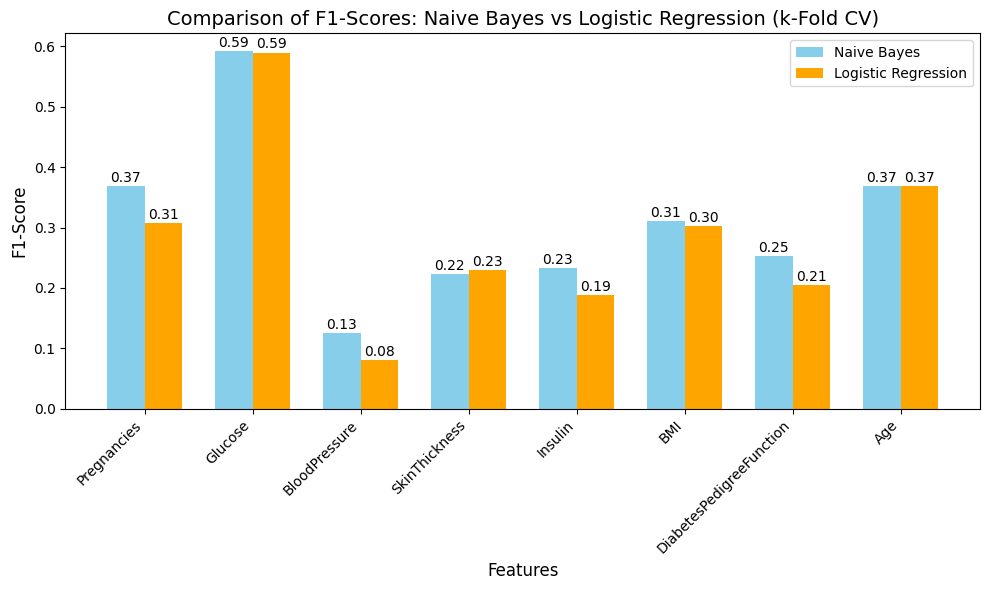

In [16]:
# Features
features = list(f1_scores_nb_cv.keys())

# F1-scores for each model
nb_scores = list(f1_scores_nb_cv.values())
lr_scores = list(f1_scores_lr_cv.values())

# Visualization
x = np.arange(len(features))  # Feature indices
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots
nb_bars = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='skyblue')
lr_bars = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Comparison of F1-Scores: Naive Bayes vs Logistic Regression (k-Fold CV)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right', fontsize=10)
ax.legend()

# Annotate bars with values
for bars in [nb_bars, lr_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

As we can see in the above visual representation, the Naive Bayes and Logistic Regresson models have quite similar F-scores, except for BloodPressure and SkinThickness, where the F-scores of each are much higher than logistic regression. The failures of logistic regression in using BloodPressure and SkinThickness may have to do with the model's assumption of linear relationships. Overall, from the findings, we find that Naive Bayes is the better model in terms of F-score, which measures each model's precision and recall.

# Milestone 3

## 1. Final Model Performance Analysis

As we have determined from Milestone 3, the Naive Bayes model somewhat surprisingly performs better as the ML model of choice based on the F1 scores of the Naive Bayes and Logistic Regression implementation of our dataset

To gain a better understanding of the performance benchworks and interprability of Naive Bayes against Logistic Regression, I will find the SHAP values of both models:

Install the SHAP

In [1]:
pip install shap

Import shap library

In [17]:
import shap

Train the model (already done in Milestone 2 but repeated again for clarity) using k-cross validation. Then, compute the SHAP values for both naive bayes and logistic regression.

In [18]:
# Define features and target
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target = "Outcome"

X = df_cleaned[features]
y = df_cleaned[target]

# Number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# SHAP values storage
shap_values_nb = []
shap_values_lr = []

# Naive Bayes Model
nb_model = GaussianNB()

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train models with k-Fold Cross-Validation and compute SHAP values
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Naive Bayes and compute SHAP
    nb_model.fit(X_train, y_train)
    explainer_nb = shap.Explainer(nb_model.predict_proba, X_train)
    shap_values_nb.append(explainer_nb(X_test))

    # Train Logistic Regression and compute SHAP
    lr_model.fit(X_train, y_train)
    explainer_lr = shap.Explainer(lr_model, X_train)
    shap_values_lr.append(explainer_lr(X_test))

# Combine SHAP values from all folds
shap_values_nb_combined = np.concatenate([sv.values for sv in shap_values_nb])
shap_values_lr_combined = np.concatenate([sv.values for sv in shap_values_lr])

Visualize the results of applying SHAP to the data models


*   The first graph shows the SHAP values for Naive Bayes and second for Logistic Regression
*   The last two graphs are an example visualization of the impacts of Glucose using Logistic Regression and the impacts of BMI using Naive Bayes



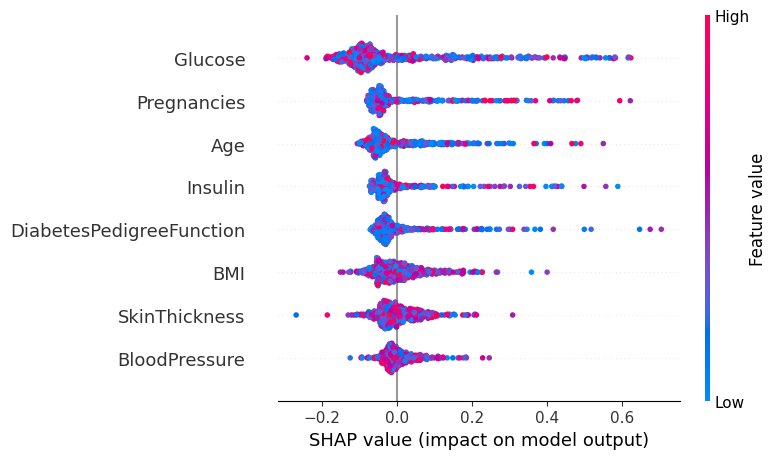

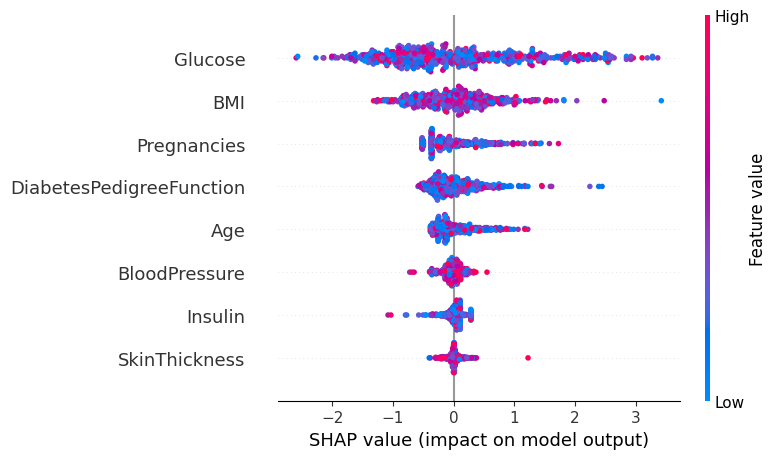

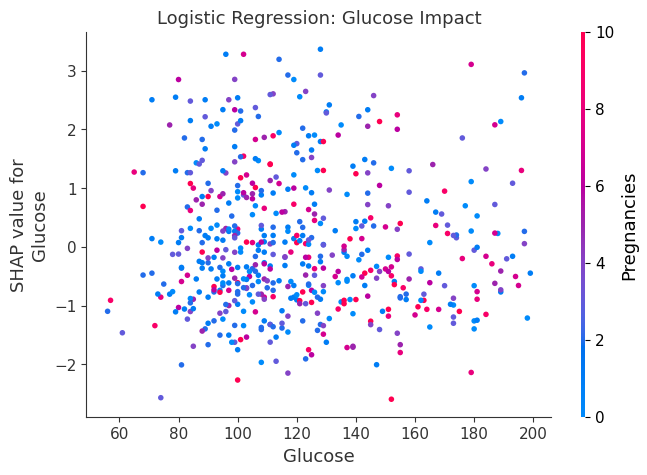

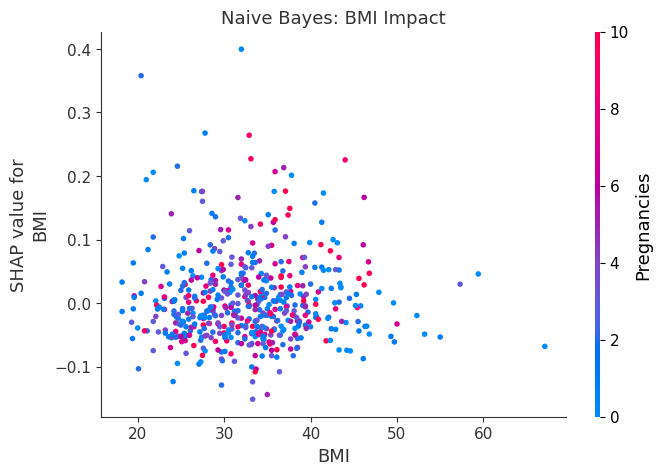

In [19]:
# Visualize SHAP values
shap.summary_plot(shap_values_nb_combined[:, :, 1], X, feature_names=features, title="Naive Bayes SHAP Summary")
shap.summary_plot(shap_values_lr_combined, X, feature_names=features, title="Logistic Regression SHAP Summary")

# Optional: Dependence plots for specific features
shap.dependence_plot("Glucose", shap_values_lr_combined, X, feature_names=features, title="Logistic Regression: Glucose Impact")
shap.dependence_plot("BMI", shap_values_nb_combined[:, :, 1], X, feature_names=features, title="Naive Bayes: BMI Impact")


From the visualizations, it is clear that logistic regression allows each feature a more balanced impact on the resulting prediction. Furthermore, the SHAP visualizations may indicate that logistic regression is less vulnerable to outliers and skewed data. For example, take a look at how many more features for Naive Bayes have variables at the right-end that have a larger impact on prediction than the average. Matter of fact, most of the feature variables in Naive Bayes have a negative impact on the prediction, due to those outliers. Despite having a slightly lower F1 score on average compared to naive bayes, the results indicate that logistic regression is a stronger and more encompassing model for our data. **Therefore, the model of choice is logistic regression.**

## 2. Deployment Plan

As mentioned, the model of choice, based on the evaluation and interpretability results, is **logistic regression**.

Deploying a ML model like Logistic Regression requires a robust architecture that handles data input, model inference, monitoring, and user interaction efficiently. Below, I outline a detailed deployment architecture and simulate a mock deployment process in code and description form:

Here I describe the deployment plan:


1.   **Model:** Logistic Regression model stored in a serialized format using joblib.

2.   **Data Pipelines:** Preprocessing pipeline: Ensures incoming data is cleaned and standardized.
Batch/streaming pipeline: Handles real-time or batch input data for predictions.
3. **Model API:**
Use FastAPI to train and visualize predictions of model
4. **Monitoring Systems:**
Tracks model performance, input data drift, and server health
5. **UI:**
A simple front-end dashboard to input data and view predictions or logs, using FastAPI.





The following implements the code for a **mock deployment**:

Install gradio for UI

In [21]:
!pip install gradio pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


**Code Implementation**
1. The following code first trains the model based on the cleaned data from our file import in Milestone 1.
2. It then allows the user through the Gradio UI three options:
  1.   **Enter data** and find probability of diabetes based on their data
  2.   Tell the model whether the person with these data points actually had diabetes
  3.   **Retrain** the model based on all the data that they entered (user must first do Step 2 if they want the data to be considered for retraining)
3. The code uses 3 different functions (predict_diabetes, handle_feedback, retrain_model) to implement the options in Step 2



In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import gradio as gr
import io
from sklearn import preprocessing

# Work on copy of df_cleaned
df_mock = df_cleaned.copy()

# Create newdata list that will store all new data user enters
# where they enter if the person actually has diabetes or not
# done with the purposes of retraining the model
new_data = pd.DataFrame(columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])
new_data['Outcome'] = pd.Series(dtype='Int64')
# Starts by training the data

# Create k-Fold instance
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Train logistic regression model on all data using k-Fold Cross-Validation
final_model = LogisticRegression()
for train_index, test_index in kf.split(df_mock):
    # Use all the data for training in each fold
    X_train, y_train = df_mock.iloc[train_index][features], df_mock.iloc[train_index][target]
    # Create a StandardScaler instance
    scaler = preprocessing.StandardScaler()
    # Fit the scaler to the training data and transform it
    X_train_scaled = scaler.fit_transform(X_train)
    # Fit the logistic regression model to the scaled training data
    final_model.fit(X_train_scaled, y_train)


# Function to predict the probability of diabetes
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness,
                     Insulin, BMI, DiabetesPedigreeFunction, Age):
    user_stats = {
    "Pregnancies": Pregnancies,
    "Glucose": Glucose,
    "BloodPressure": BloodPressure,
    "SkinThickness": SkinThickness,
    "Insulin": Insulin,
    "BMI": BMI,
    "DiabetesPedigreeFunction": DiabetesPedigreeFunction,
    "Age": Age
    }
    # users's stats as a DataFrame row
    user_data = pd.DataFrame([[
      user_stats["Pregnancies"],
      user_stats["Glucose"],
      user_stats["BloodPressure"],
      user_stats["SkinThickness"],
      user_stats["Insulin"],
      user_stats["BMI"],
      user_stats["DiabetesPedigreeFunction"],
      user_stats["Age"]
    ]], columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
    # Scale user's data using the fitted scaler
    user_data_scaled = scaler.transform(user_data)

    # Predict probability for user
    user_probability = final_model.predict_proba(user_data_scaled)[:, 1][0]  # Probability of "having diabetes"
    # print(f"User's Probability of Having Diabetes: {user_probability:.2f}")

    return user_probability

# Function to handle user feedback and retrain the model
def handle_feedback(Pregnancies, Glucose, BloodPressure, SkinThickness,
                    Insulin, BMI, DiabetesPedigreeFunction, Age, feedback):
    global df_mock
    global new_data
    # Add the new data point to the dataset
    user_stats = {
    "Pregnancies": Pregnancies,
    "Glucose": Glucose,
    "BloodPressure": BloodPressure,
    "SkinThickness": SkinThickness,
    "Insulin": Insulin,
    "BMI": BMI,
    "DiabetesPedigreeFunction": DiabetesPedigreeFunction,
    "Age": Age,
    "Outcome": feedback
    }
    # users's stats as a DataFrame row
    user_data = pd.DataFrame([[
      user_stats["Pregnancies"],
      user_stats["Glucose"],
      user_stats["BloodPressure"],
      user_stats["SkinThickness"],
      user_stats["Insulin"],
      user_stats["BMI"],
      user_stats["DiabetesPedigreeFunction"],
      user_stats["Age"],
      user_stats["Outcome"]
    ]], columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
             "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

    # Add the new data point to new data
    new_data = pd.concat([new_data, user_data], ignore_index=True)
    # print(new_data)

    # Create a StringIO object
    buffer = io.StringIO()

    # Use print() with the buffer as the file argument
    print(new_data, file=buffer)

    # Get the content of the buffer as a string
    new_data_output = buffer.getvalue()

    # Close the buffer
    buffer.close()

    return f"Model updated with new data!\n{new_data_output}"

def retrain_model():
    global df_mock
    global new_data
    global final_model
    global features
    global target

    # Add the new data point to the dataset
    new_df_mock = pd.concat([df_mock, new_data], ignore_index=True)
    df_mock = new_df_mock.copy()

    # Create k-Fold instance
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Train logistic regression model on all data using k-Fold Cross-Validation
    final_model = LogisticRegression()
    for train_index, test_index in kf.split(df_mock):
        # Use all the data for training in each fold
        X_train, y_train = df_mock.iloc[train_index][features], df_mock.iloc[train_index][target]
        # Create a StandardScaler instance
        scaler = preprocessing.StandardScaler()
        # Fit the scaler to the training data and transform it
        X_train_scaled = scaler.fit_transform(X_train)
        # Fit the logistic regression model to the scaled training data
        final_model.fit(X_train_scaled, y_train)

    # Now, all references to final_model will account for new data entered by user
    return "Model retrained based on new data! Thanks for helping us improve our model!"

oldfeedback = ""
# Gradio UI
def interactive_ui(Pregnancies, Glucose, BloodPressure, SkinThickness,
                   Insulin, BMI, DiabetesPedigreeFunction, Age, feedback, retrain):
    global oldfeedback
    probability = predict_diabetes(Pregnancies, Glucose, BloodPressure,
                                   SkinThickness, Insulin, BMI,
                                   DiabetesPedigreeFunction, Age)
    feedback_response = ""
    if feedback is not None and retrain != 1:
        feedback_response = handle_feedback(Pregnancies, Glucose, BloodPressure,
                                            SkinThickness, Insulin, BMI,
                                            DiabetesPedigreeFunction, Age, feedback)
        oldfeedback = feedback_response

    retrain_response = ""
    if retrain is not None and retrain == 1:
        retrain_response = retrain_model()
        feedback_response = oldfeedback

    return f"Probability of Diabetes: {probability:.2f}", feedback_response, retrain_response

# Define the Gradio Interface
interface = gr.Interface(
    fn=interactive_ui,
    inputs=[
        gr.Slider(0, 15, step=1, label="Pregnancies"),
        gr.Slider(0, 200, step=1, label="Glucose"),
        gr.Slider(0, 122, step=1, label="BloodPressure"),
        gr.Slider(0, 99, step=1, label="SkinThickness"),
        gr.Slider(0, 846, step=1, label="Insulin"),
        gr.Slider(0, 67.1, step=0.1, label="BMI"),
        gr.Slider(0.0, 2.5, step=0.01, label="DiabetesPedigreeFunction"),
        gr.Slider(0, 100, step=1, label="Age"),
        gr.Radio([0, 1, None], label="Does the person actually have diabetes? (0=No, 1=Yes, None=Skip Feedback)"),
        gr.Radio([0, 1, None], label="Do you want to retrain the model based on new data? (0=No, 1=Yes, None=Skip Feedback)")
    ],
    outputs=[
        gr.Textbox(label="Probability"),
        gr.Textbox(label="Feedback Response"),
        gr.Textbox(label="Retrain Response")
    ],
    live=True
)

# Launch the Gradio Interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b5bc15c896c8fc7a40.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Scalability, Maintenance, and Compliance with Legal Regulations:**

*   **Scalability:** There are various ways to scale the trained model, such as using a containerized environment for consistency across deployments, deploy using Kubernetes to handle load balancing and scaling, and using cloud-based memory storage for easy memory sharing and connectivity. Please keep in mind the importance of security when scaling ML models.
*    **Maintenance:**
Regularly retrain pipelines to keep the model up-to-date with new data.
Automate monitoring can also be used to drift and trigger alerts for retraining. It is also important to store logs and performance metrics.
* **Compliance:**
Ensure compliance with data privacy laws (e.g., GDPR, HIPAA):
Anonymize sensitive data in pipelines.
Log user consent for model predictions.
Implement security best practices (e.g., API authentication, encryption).



## 3. Ethical Considerations

While the importance of assisting medical profesionals with tools that allow them to diagnose diseases such as diabetes early cannot be understated, there are several ethical considerations to be made about the use of such tools, including this one:


1.   **Overconfidence and Misrepresentative Advertising:** No model can definitively determine if a patient has diabetes. Since this is only based on the determination of a medical professional, it would be inappropriate to advertise this model and similar ML models as a tool that can diagnose diabetes. It is important to be as transparent and allow the model to be interpretable as possible, as to not misrepresent the true use case of this model. This model is intended to be used as a tool for medical professionals, not intended to replace the judgement and expertise of a medical professional. For example, this model can predict that a certain patient has a 1% chance of having diabetes, but they may end up actually having the disease despite the model's prediction.
2.   **Protection of sensitive data:** The training and maintainance of this model relies on sensitive data from real people, and their confidential information must be kept private and secure.
3. **Discrimination:** This model was trained on data sampled on specifically Native American women. While it is important to assert that the data was based on a particular group, and that research shows that people of certain ethnic backgrounds may be more vulnerable to diabetes, it is important not to train the data on sensitive variables such as race, while still being transparent about the trained data's specific sample background.
4. **Need for Transparency:** Given the sensitive nature of the context in which this model is deployed and is intended for use, it is important to be as transparent as possible about the inner workings of the model, its performance abilities, and especially the flaws in its predictive ability. While it may not seem advantageous to express this model's flaws, it is important to remember that on-field failures of this model can significantly harm the lives of real people, and harm the reputation of contractors and stakeholders involved in the deployment of this model




**Recommendations for Ensuring Ethical Standards:**


*   **Ensure fairness** Hyperparametrize the model to account for sensitive variables such as race and gender so that predictions between different patients with similar features are also similar
*   **Accountability:** Strictly enforce ethical standards in the training of this model. Keep logs of programmar actions. It is the responsibility of both engineer and project manager to ensure ethical standards are being met. Finger-pointing must not be done by either team or manager, and logs should be used as a source of evidence.
* **Compliance:** Comply with all regulations such as HIPPA. Employ a quality assurance team with legal experts that check and evaluates compliance standards for all products based on ML models. Ensure model is interpretable for said quality ensurance team. Remember, what is easy for an engineer to understand may be difficult for a lawyer. And what is easy for a lawyer to understand may be difficult for an engineer. High interprability ensures clear communication accross teams.

